Instead of points being joined by line segments (as in line plots), here the points are represented **individually** with a dot, circle, or other shape.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

## Scatter Plots with `plt.plot`

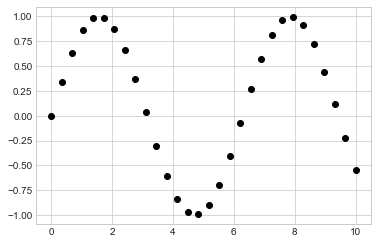

In [2]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black')

The third argument in the function call is a character that represents the type of symbol used for the plotting. 

Common marker styles: 'o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd'

(0, 8)

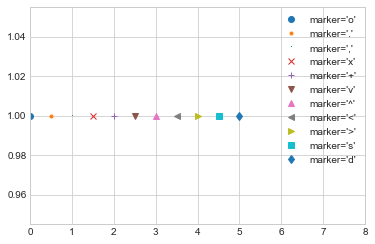

In [13]:
rng = np.random.RandomState(42)
common_marker_style = ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']

for i, marker in enumerate(common_marker_style):
    plt.plot(0.5*i, 1, marker, label=f"marker='{marker}'")
    
plt.legend(numpoints=1)
plt.xlim(0, 8)

For even more possibilities, these character codes can be used together with line and color codes to plot points along with a line connecting them:

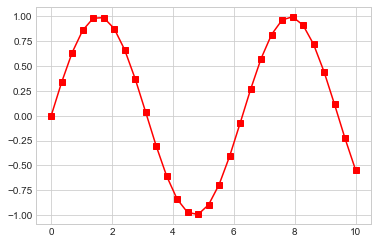

In [17]:
plt.plot(x, y, '-sr');

Additional keyword arguments to `plt.plot` specify a wide range of properties of the lines and markers. E.g.:

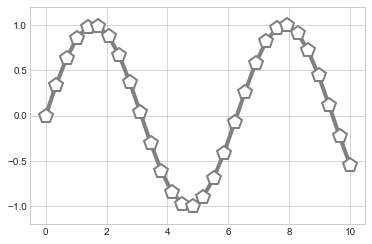

In [18]:
plt.plot(x, y, '-p', color='gray',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.ylim(-1.2, 1.2);

## Scatter Plots with `plt.scatter`

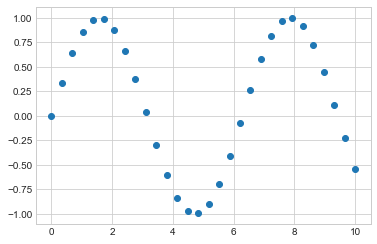

In [19]:
plt.scatter(x, y, marker='o');

The primary difference of `plt.scatter` from `plt.plot` is that it can be used to **create scatter plots where the properties of each individual point (size, face color, edge color, etc.) can be individually controlled or mapped to data**.

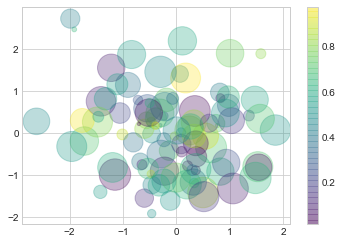

In [20]:
# Create a random scatter plot with points of many colors and sizes

rng = np.random.RandomState(42)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='viridis')
plt.colorbar() # show color scale


the color argument is automatically mapped to a color scale (shown here by the `colorbar()` command), and that the size argument is given in pixels. 

In this way, the color and size of points can be used to convey information in the visualization, in order to visualize multidimensional data.

For example, we might use the Iris data from Scikit-Learn, where each sample is one of three types of flowers that has had the size of its petals and sepals carefully measured:

Text(0, 0.5, 'sepal width (cm)')

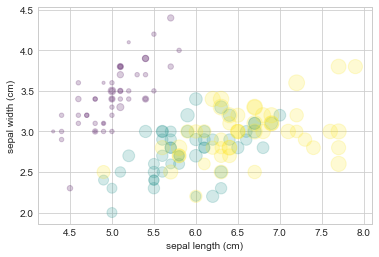

In [30]:
from sklearn.datasets import load_iris

iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

This scatter plot has given us the ability to simultaneously explore four different dimensions of the data: 

- the (x, y) location of each point corresponds to the sepal length and width, 

- the size of the point is related to the petal width, and 

- the color is related to the particular species of flower.

## `plot` Vs. `scatter`

While it doesn't matter as much for small amounts of data, as datasets get larger than a few thousand points, `plt.plot` can be **noticeably more efficient** than `plt.scatter`. 

The reason is:

- `plt.scatter` has the capability to render a different size and/or color for *each* point, so the renderer must do the extra work of constructing each point *individually*. 

- In `plt.plot`, on the other hand, the points are always essentially clones of each other, so the work of determining the appearance of the points is done only once for the entire set of data. 

For large datasets, the difference between these two can lead to **vastly different** performance. For this reason, **`plt.plot` should be preferred over `plt.scatter` for large datasets.**
